<a href="https://colab.research.google.com/github/minbarry-0915/AI_practice/blob/main/AI_HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch

## 실습 1 ##
A = torch.tensor([[1., -1.], [1., -1.]])
print('A = ', A)
B = torch.tensor(np.array([[1,2,3],[4,5,6]]))
print('B = ', B)

C = torch.rand(3,3)
print('C = ', C)

D = C.numpy()
print('D = ', D)

E = B.view(1,1,2,3)
print('E = ', E)

print('sum of A  = ', A.sum())
print('mean of A = ', A.mean())

A =  tensor([[ 1., -1.],
        [ 1., -1.]])
B =  tensor([[1, 2, 3],
        [4, 5, 6]])
C =  tensor([[0.8480, 0.0194, 0.5425],
        [0.3343, 0.1450, 0.2286],
        [0.2310, 0.7569, 0.5253]])
D =  [[0.8479715  0.01936865 0.5424599 ]
 [0.33431488 0.14499027 0.22859651]
 [0.23097473 0.7568917  0.5253498 ]]
E =  tensor([[[[1, 2, 3],
          [4, 5, 6]]]])
sum of A  =  tensor(0.)
mean of A =  tensor(0.)


In [ ]:
import torch

data = [[1,2],[3,4]]
x_data = torch.tensor(data)

import numpy as np
np_array = np.array(data)
tensor_from_numpy = torch.from_numpy(np_array)

x_zeros = torch.zeros(2,3)
x_ones = torch.ones(3,2)
x_rand = torch.rand(2,2)

random_uniform = torch.rand(3,3)
int_tensor = torch.tensor([1,2,3])
float_tensor = torch.tensor([1.0,2.0,3.0])
tensor_a = torch.rand(3,3)
ones_like_a = torch.ones_like(tensor_a)

# Check if CUDA (GPU support) is available
if torch.cuda.is_available():
  # Create a tensor
  tensor = torch.randn(3, 3) # Replace with your tensor
  # Move the tensor to the GPU
  tensor_gpu = tensor.to('cuda')
  print("Tensor moved to GPU:", tensor_gpu)
else:
  print("CUDA is not available. Tensor cannot be moved to GPU.")

Tensor moved to GPU: tensor([[-1.1626, -0.1514, -0.2848],
        [-0.7309,  0.0846,  2.4920],
        [-0.9439,  0.2925, -0.2240]], device='cuda:0')


In [ ]:
import torch
# Create a tensor and set requires_grad=True to track computation with it
x = torch.tensor([2.0, 3.0, 4.0], requires_grad=True)
# Define a quadratic function: y = 3 * (x ** 2)
y = 3 * (x ** 2)
# Compute the sum of y to create a scalar output
z = y.sum()
# Perform backpropagation to compute gradients of z with respect to x
z.backward()
# Print the computed gradients
print(x.grad) # This should print the gradient at x = [2.0, 3.0, 4.0]


tensor([12., 18., 24.])


In [ ]:
import torch
x = torch.tensor([[2.]], requires_grad=True)  # leaf tensor
print('x = ', x)
print('x.data = ', x.data)
print('x.grad = ', x.grad)
print('x.grad_fn() = ', x.grad_fn)

# 연산 수행
y = x * x * 3  # non-leaf tensor
y.retain_grad()  # non-leaf tensor의 grad 저장 활성화
print('\ny = ', y)
print('y.data = ', y.data)
print('y.grad = ', y.grad)  # 아직 None (역전파 전)
print('y.grad_fn() = ', y.grad_fn)

z = y ** 2  # non-leaf tensor
z.retain_grad()  # non-leaf tensor의 grad 저장 활성화
print('\nz = ', z)
print('z.data = ', z.data)
print('z.grad = ', z.grad)  # 아직 None (역전파 전)

# 역전파 수행
z.backward()
print('\nAfter invocation of backward()')

# leaf tensor
print('\nx = ', x)
print('x.data = ', x.data)
print('x.grad = ', x.grad)  # leaf tensor의 grad는 자동 계산됨
print('x.grad_fn( ) = ', x.grad_fn)

# non-leaf tensor
print('\ny = ', y)
print('y.data = ', y.data)
print('y.grad = ', y.grad)  # non-leaf tensor의 grad 접근 가능
print('y.grad_fn( ) = ', y.grad_fn)

print('\nz = ', z)
print('z.data = ', z.data)
print('z.grad = ', z.grad)  # non-leaf tensor의 grad 접근 가능


x =  tensor([[2.]], requires_grad=True)
x.data =  tensor([[2.]])
x.grad =  None
x.grad_fn() =  None

y =  tensor([[12.]], grad_fn=<MulBackward0>)
y.data =  tensor([[12.]])
y.grad =  None
y.grad_fn() =  <MulBackward0 object at 0x7eeca5997550>

z =  tensor([[144.]], grad_fn=<PowBackward0>)
z.data =  tensor([[144.]])
z.grad =  None

After invocation of backward()

x =  tensor([[2.]], requires_grad=True)
x.data =  tensor([[2.]])
x.grad =  tensor([[288.]])
x.grad_fn( ) =  None

y =  tensor([[12.]], grad_fn=<MulBackward0>)
y.data =  tensor([[12.]])
y.grad =  tensor([[24.]])
y.grad_fn( ) =  <MulBackward0 object at 0x7eeca5997910>

z =  tensor([[144.]], grad_fn=<PowBackward0>)
z.data =  tensor([[144.]])
z.grad =  tensor([[1.]])


신경망 모델 구성

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
# Define the neural network class
class SimpleNeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(SimpleNeuralNet, self ).__init__()
    # First fully connected layer
    self.fc1 = nn.Linear(input_size, hidden_size)
    # Second fully connected layer that outputs our classes
    self.fc2 = nn.Linear(hidden_size, num_classes)
  def forward(self, x):
    # Pass the input through the first layer, then apply a ReLU activation
    x = F.relu(self.fc1(x))
    # Pass the output through the second layer
    x = self.fc2(x)
    return x

# Define the size of our layers and number of classes
input_size = 784 # Example for flattened 28x28 pixel image input
hidden_size = 500 # Number of nodes in the hidden layer
num_classes = 10 # Number of output classes (e.g., for digits 0-9)

# Create an instance of our neural network
model = SimpleNeuralNet(input_size, hidden_size, num_classes)
print(model)


SimpleNeuralNet(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)


학습가능 파라미터 확인

In [ ]:
import torch
import torch.nn as nn
# Define a simple neural network
class SimpleNet(nn.Module):
  def __init__(self ):
    super(SimpleNet, self ).__init__()
    self.fc1 = nn.Linear(10, 5) # A fully connected layer
    self.fc2 = nn.Linear(5, 2) # Another fully connected layer
  def forward(self, x):
    x = torch.relu(self.fc1(x))
    x = self.fc2(x)
    return x
# Create an instance of the network
net = SimpleNet()
# Print the learnable parameters
for param in net.parameters():
  print(param)


Parameter containing:
tensor([[-0.3088, -0.3161, -0.2099, -0.1640,  0.2435, -0.1238, -0.1802,  0.3051,
          0.2772,  0.3115],
        [-0.2406,  0.0573,  0.0244,  0.2363,  0.2835,  0.2885,  0.2706,  0.0533,
         -0.0843,  0.1962],
        [-0.2198,  0.3049,  0.3017,  0.1725, -0.1607, -0.1312, -0.2123,  0.1600,
          0.0426,  0.2099],
        [-0.2207, -0.0527, -0.0791, -0.0787, -0.2665,  0.0383, -0.2442,  0.2693,
         -0.0896,  0.2318],
        [-0.1468, -0.0922, -0.2152, -0.1916,  0.0581, -0.2412,  0.0467,  0.2328,
         -0.1083,  0.2134]], requires_grad=True)
Parameter containing:
tensor([ 0.1360, -0.1980, -0.0432,  0.1540,  0.0453], requires_grad=True)
Parameter containing:
tensor([[ 0.2062,  0.3697,  0.4335,  0.1920,  0.1053],
        [-0.2307, -0.1255, -0.1183, -0.3160,  0.2100]], requires_grad=True)
Parameter containing:
tensor([-0.2748, -0.1908], requires_grad=True)


학습된 모델 저장

In [ ]:
class SimpleNet(nn.Module):
  def __init__(self ):
    super(SimpleNet, self ).__init__()
    self.fc1 = nn.Linear(10, 5)
    self.fc2 = nn.Linear(5, 2)
  def forward(self, x):
    x = torch.relu(self.fc1(x))
    x = self.fc2(x)
    return x
# Create an instance of the network (example)
net = SimpleNet()
# Assuming the model is trained here
# ...
# Save the model's state dictionary
torch.save(net.state_dict(), 'model_weights.pth')
print("Model's state dict saved as 'model_weights.pth'")

Model's state dict saved as 'model_weights.pth'


저장된 모델 적재

In [ ]:
import torch
class SimpleNet(nn.Module):
  def __init__(self ):
    super(SimpleNet, self ).__init__()
    self.fc1 = nn.Linear(10, 5)
    self.fc2 = nn.Linear(5, 2)
  def forward(self, x):
    x = torch.relu(self.fc1(x))
    x = self.fc2(x)
    return x
# 먼저 모델 객체 생성
net = SimpleNet()
# Load the saved state_dict
net.load_state_dict(torch.load('model_weights.pth', weights_only=True))
# If you are loading the model for inference (not training), set to eval mode
model.eval()

SimpleNeuralNet(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

DataSet과 DataLoader

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
# Example custom dataset
class CustomDataset(Dataset):
  def __init__(self, data, labels):
    self.data = data
    self.labels = labels
  def __len__(self ):
    return len(self.data)
  def __getitem__(self, index):
    return self.data[index], self.labels[index]
# Sample data
data = torch.randn(100, 10) # 100 samples, 10 features each
labels = torch.randint(0, 2, (100,)) # 100 labels (binary classification)# Create dataset
dataset = CustomDataset(data, labels)
# Create DataLoader
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)
# Iterate through the DataLoader
for batch in dataloader:
  batch_data, batch_labels = batch # Perform operations on batch_data and batch_labels

모델 학습 및 추론

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
# Define a simple model
class SimpleModel(nn.Module):
  def __init__(self ):
    super(SimpleModel, self ).__init__()
    self.fc1 = nn.Linear(10, 50)
    self.dropout = nn.Dropout(0.25)
    self.fc2 = nn.Linear(50, 2)
  def forward(self, x):
    x = torch.relu(self.fc1(x))
    x = self.dropout(x)
    # Dropout during training
    return x
model = SimpleModel()

# 손실함수와 optimizer
Criterion = nn.CrossEntropyLoss()
Optimizer = optim.SGD(model.parameters(), lr=0.01)
# 학습데이터 (inputs and labels)
Inputs = torch.randn(5, 10) # 10개 입력 속성의 5개 데이터
labels = torch.randint(0, 2, (5,)) # 이진 분류 출력
# 학습모드 설정
model.train()
for epoch in range(5): # epoch 수
  Optimizer.zero_grad() # 파라미터 그레디언트 0 초기화
  # forward pass
  outputs = model(Inputs)
  loss = Criterion(outputs, labels)
  # backward pass + optimize
  loss.backward() # 그레디언트 개산
  Optimizer.step() # 가중치 갱신
# 추론모드 설정
model.eval()
with torch.no_grad(): # 그레디언트 미계산
  outputs = model(Inputs)

 PyTorch의 MLP 프로그래밍


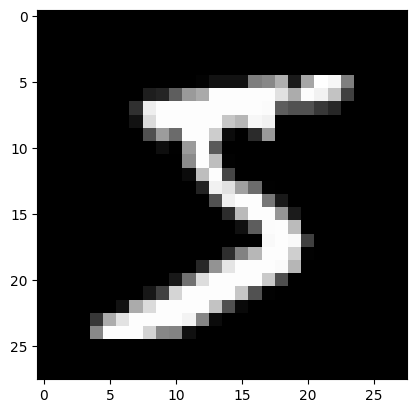

이미지 레이블: 5
시작 정확도: 851/10000 (9%)
에포크 0: 완료
학습중 정확도: 9416/10000 (94%)
에포크 1: 완료
학습중 정확도: 9552/10000 (96%)
에포크 2: 완료
학습중 정확도: 9543/10000 (95%)
학습후 정확도: 9543/10000 (95%)
10 번째 학습 데이터의 테스트 결과 : tensor([-2.6341, 11.5339, -5.2136, -2.8809, -0.9954, -5.7306, -4.0908, -8.3414,
         1.2382, -5.1854], grad_fn=<ViewBackward0>)
10 번째 데이터의 예측: 1
실제 레이블: 1


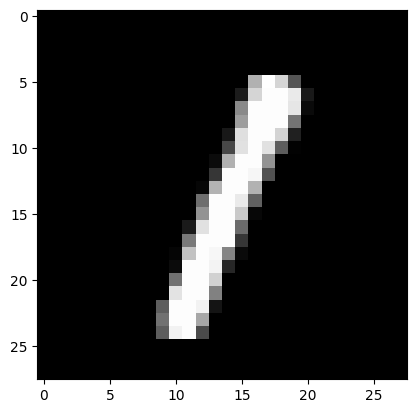

In [ ]:
#_*_ coding: utf-8 _*_

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

X = mnist.data/255
y = mnist.target

import matplotlib.pyplot as plt
plt.imshow(X.iloc[0].values.reshape(28,28), cmap='gray') # X.iloc[0]로 첫 번째 행을 선택하고 .values로 NumPy 배열로 변환합니다.
plt.show()
print("이미지 레이블: {}".format(y[0]))

import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 1/7, random_state = 0)
X_train  = torch.Tensor(X_train.values)
X_test = torch.Tensor(X_test.values)
y_train = torch.LongTensor(list(map(int, y_train)))
y_test = torch.LongTensor(list(map(int, y_test)))

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

from torch import nn
model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

from torch import optim
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

def train(epoch):
  model.train()
  for data, targets in loader_train:
    optimizer.zero_grad()
    outputs = model(data)
    loss = loss_fn(outputs, targets)
    loss.backward()
    optimizer.step()
  print('에포크 {}: 완료'.format(epoch))

def test(head):
  model.eval()
  correct = 0
  with torch.no_grad():
    for data, targets in loader_test:
      outputs = model(data)
      _, predicted = torch.max(outputs.data, 1)
      correct += predicted.eq(targets.data.view_as(predicted)).sum()
    data_num = len(loader_test.dataset)
    print('{} 정확도: {}/{} ({:.0f}%)'.format(head, correct, data_num, 100. * correct / data_num))

test('시작')
for epoch in range(3):
  train(epoch)
  test('학습중')
test('학습후')

index = 10
model.eval()
data = X_test[index]
output = model(data)
print('{} 번째 학습 데이터의 테스트 결과 : {}'.format(index, output))
_, predicted = torch.max(output.data, 0)
print('{} 번째 데이터의 예측: {}'.format(index, predicted))
X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28,28), cmap='gray')
print('실제 레이블: {}'.format(y_test[index]))

[실습] CNN 모델을 이용한 MNIST 데이터 분류

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

X = mnist.data/255
y = mnist.target

import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 1/7, random_state=0)
X_train = torch.Tensor(X_train.values)
X_test = torch.Tensor(X_test.values)
y_train = torch.LongTensor(list(map(int, y_train)))
y_test = torch.LongTensor(list(map(int, y_test)))

import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torch.autograd import Variable

X_train = X_train.view(-1,1,28,28).float()
X_test = X_test.view(-1,1,28,28).float()
print(X_train.shape)
print(X_test.shape)

train = TensorDataset(X_train, y_train)
test = TensorDataset(X_test, y_test)

BATCH_SIZE = 32
train_loader = DataLoader(train, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test, batch_size=BATCH_SIZE, shuffle=False)

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(1,32, kernel_size=5)
    self.conv2 = nn.Conv2d(32,32, kernel_size=5)
    self.conv3 = nn.Conv2d(32,64, kernel_size=5)
    self.fn1 = nn.Linear(3*3*64, 256)
    self.fn2 = nn.Linear(256, 10)

    self.loss_fn = nn.CrossEntropyLoss()
    self.optimizer = optim.Adam(self.parameters(), lr=0.01)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(F.max_pool2d(self.conv2(x), 2))
    x = F.dropout(x, p=0.5, training=self.training)
    x = F.relu(F.max_pool2d(self.conv3(x),2))
    x = F.dropout(x, p=0.5, training=self.training)
    x = x.view(-1,3*3*64)
    x = F.relu(self.fn1(x))
    x = F.dropout(x, training=self.training)
    x = self.fn2(x)
    return F.log_softmax(x, dim = 1)

def fit(model, loader_train):
  optimizer = torch.optim.Adam(model.parameters())
  error = nn.CrossEntropyLoss()
  EPOCHS = 1
  model.train()
  for epoch in range(EPOCHS):
    correct = 0
    for batch_idx, (X_batch, y_batch) in enumerate(loader_train):
      # Reshape X_batch to have the correct dimensions for the convolutional layer
      var_X_batch = Variable(X_batch.view(-1, 1, 28, 28)).float()  # Reshape to [batch_size, channels, height, width]
      var_y_batch = Variable(y_batch)
      optimizer.zero_grad()
      output = model(var_X_batch)
      loss = error(output, var_y_batch)
      loss.backward()
      optimizer.step()
      predicted = torch.max(output.data, 1)[1]
      correct += (predicted == var_y_batch).sum()
      if batch_idx % 50 == 0:
        print('에포크 : {} [{}/{} ({:.0f}%)]\t 손실함수 : {:.6f}\t Accuracy:{:.3f}%'.format(epoch, batch_idx*len(var_X_batch), len(loader_train.dataset), 100.*batch_idx / len(loader_train), loss.data, float(correct*100) / float(BATCH_SIZE*(batch_idx+1))))
def evaluate(model):
  correct = 0
  for test_imgs, test_labels in loader_test:
    # Reshape test_imgs to have the correct dimensions for the convolutional layer
    test_imgs = test_imgs.view(-1, 1, 28, 28).float()  # Reshape to [batch_size, channels, height, width]
    test_imgs = Variable(test_imgs).float()
    output = model(test_imgs)
    predicted = torch.max(output,1)[1]
    correct += (predicted == test_labels).sum()

  print("테스트 데이터 정확도 : {:.3f}% ".format(float(correct)/(len(loader_test)*BATCH_SIZE)))

cnn = CNN()
evaluate(cnn)
fit(cnn, loader_train)
cnn.eval()
evaluate(cnn)
index = 10
data = X_test[index].view(-1,1,28,28).float()
output = cnn(data)
print('{} 번째 학습 데이터의 테스트 결과 : {}'.format(index, output))
_, predicted = torch.max(output.data, 1)
print('{} 번째 데이터의 예측: {}'.format(index, predicted.numpy()))
print('실제 레이블: {}'.format(y_test[index]))

torch.Size([60000, 1, 28, 28])
torch.Size([10000, 1, 28, 28])
테스트 데이터 정확도 : 0.196% 
에포크 : 0 [0/60000 (0%)]	 손실함수 : 2.310141	 Accuracy:12.500%
에포크 : 0 [3200/60000 (5%)]	 손실함수 : 0.941365	 Accuracy:83.640%
에포크 : 0 [6400/60000 (11%)]	 손실함수 : 0.285991	 Accuracy:122.401%
에포크 : 0 [9600/60000 (16%)]	 손실함수 : 0.258957	 Accuracy:140.252%
에포크 : 0 [12800/60000 (21%)]	 손실함수 : 0.248562	 Accuracy:150.451%
에포크 : 0 [16000/60000 (27%)]	 손실함수 : 0.382346	 Accuracy:157.034%
에포크 : 0 [19200/60000 (32%)]	 손실함수 : 0.267048	 Accuracy:161.856%
에포크 : 0 [22400/60000 (37%)]	 손실함수 : 0.127414	 Accuracy:165.037%
에포크 : 0 [25600/60000 (43%)]	 손실함수 : 0.113503	 Accuracy:167.807%
에포크 : 0 [28800/60000 (48%)]	 손실함수 : 0.184713	 Accuracy:170.039%
에포크 : 0 [32000/60000 (53%)]	 손실함수 : 0.197293	 Accuracy:171.831%
에포크 : 0 [35200/60000 (59%)]	 손실함수 : 0.039727	 Accuracy:173.350%
에포크 : 0 [38400/60000 (64%)]	 손실함수 : 0.217560	 Accuracy:174.558%
에포크 : 0 [41600/60000 (69%)]	 손실함수 : 0.176676	 Accuracy:175.826%
에포크 : 0 [44800/60000 (75%)]	 손실